In [1]:
from sage.all import *

from sage.graphs.graph import Graph
from sage.graphs.distances_all_pairs import distances_all_pairs
from sage.homology.chain_complex import ChainComplex

from sage.graphs.graph_generators import GraphGenerators
graphs = GraphGenerators()

from sage.matrix.constructor import Matrix
matrix = Matrix()

from sage.rings.integer_ring import IntegerRing
from sage.rings.rational_field import RationalField
from sage.rings.finite_rings.finite_field_constructor import FiniteFieldFactory
BaseRing = RationalField()

import numpy as np

In [5]:
def magnitude_homology(g,lmax):

    kmax = lmax +1

    d = distances_all_pairs(g) #This function returns a double dictionary D of vertices, 
                                #in which the distance between vertices u and v is D[u][v].
    #print(d)
    #print(type(d))

    # populate the generators recursively
    # We use the fact that a chain group MC_{*,*}(G) breaks up into subgroups MC_{k,l}^{a,b}(G),
    # where s and t are the initial and terminal vertices of the chain, l is the length of the chain and k is the degree.
    # So generators[a,b,k,l] is a list of the degree k generators of a chain group.
    generators = dict(((a,b,k,l),[]) for a in g.vertices() for b in g.vertices() for k in range(kmax+2) for l in range(lmax+1))
     
    def add_generators(p,l,x):
        k = len(p)-1
        if k<=kmax and l<=lmax:
            generators[(p[0],p[len(p)-1],k,l)].append(p)
            #print(generators)
            #print(type(generators[(a[0],a[len(a)-1],k,l)]))
            for y in g.vertices():
                if x != y:
                    #print(d[x][y])
                    add_generators(p+[y],l+d[x][y],y)
        
                    
    for x in g.vertices():
        add_generators([x],0,x)
    
    #print(generators)
      

    # number the generators, so as to produce differentials rapidly
    for a in g.vertices():
        for b in g.vertices():
            for l in range(lmax+1):
                for k in range(kmax+1):
                    generators[(a,b,k,l)] = dict((tuple(p),i) for (i,p) in enumerate(generators[(a,b,k,l)]))
                    #print(generators[(a,b,k,l)])
    
        
    def differential(a,b,k,l):
        m = {}
        h = generators[(a,b,k-1,l)]
        #print(h)
        #print('len(h)',len(h))
        for (p,i) in generators[(a,b,k,l)].items():
            #print((p,i))
            for z in range(len(p)-2):
                if d[p[z]][p[z+1]] + d[p[z+1]][p[z+2]] == d[p[z]][p[z+2]]:
                    j = h[p[:z+1]+p[z+2:]]
                    if z%2:
                        m[(j,i)] = m.get((j,i),0) + 1
                    else:
                        m[(j,i)] = m.get((j,i),0) - 1
        print('m',m)
        
        #dataMatrix = np.array([tuple(p) for (i,p) in enumerate(generators[(a,b,k-1,l)])])
        #print ('datamatrix',dataMatrix)
                #print('len(h)',len(h))
                #print('len(generators[(a,b,k,l)])',len(generators[(a,b,k,l)]))
                #print(matrix(BaseRing, len(h), len(generators[(a,b,k,l)]), m))
        #print(matrix(BaseRing, len(h), len(generators[(a,b,k,l)]), m).dimensions())
        
        return matrix(BaseRing, len(h), len(generators[(a,b,k,l)]), m)
        #return dataMatrix
    
            
        
    def chains(a,b,l):
        differentials = dict((k,differential(a,b,k,l)) for k in range(1,kmax+1) if generators[(a,b,k,l)] or generators[(a,b,k-1,l)])
        #print('differentials:', differentials)
        return ChainComplex(differentials, base_ring=BaseRing, degree=-1)




    def homology(a,b,l):
        #print('homology', chains(a,b,l).homology(generators=True))
        return chains(a,b,l).homology(generators=True)

    return dict(((a,b,l),homology(a,b,l)) for a in g.vertices() for b in g.vertices() for l in range(lmax+1))

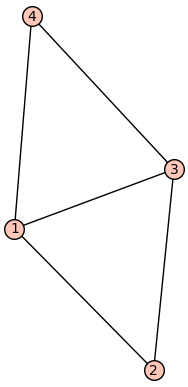

In [6]:
g = Graph([(1,2),(2,3),(3,4),(4,1),(3,1)])
#g = graphs.CycleGraph(3)
#g = graphs.PetersenGraph()
graph_name = "G"
g.show()

In [7]:
lmax = 6

print(graph_name)
print('lmax=', lmax)

homology = magnitude_homology(g,lmax)
#print('homology:', homology)

total_rank = dict(((k,l),0) for k in range(0,lmax+1) for l in range(0, lmax+1))

#print('total rank:', total_rank)

for a in g.vertices():
    for b in g.vertices():
        for l in range(lmax+1):
            sorted(homology[a,b,l].items())
            #print(list(homology[s,t,l].items()))
            for degree, group in homology[a,b,l].items(): 
                #print(total_rank[degree,l])
                total_rank[degree,l] += group.rank()
                #print(total_rank[degree,l])


for l in range(0,lmax+1):
    print(l,':')
    for k in range(0,lmax+1):
        if total_rank[k,l] != 0:
            print(total_rank[k,l])
        #else:
        #    print('      ')

G
lmax= 6
m {}
m {}
m {}
m {}
m {}
m {}
m {(0, 2): 1, (0, 4): 1, (1, 10): 1, (1, 13): 1}
m {}
m {}
m {(0, 3): 1, (0, 8): 1, (1, 15): -1, (1, 17): -1, (2, 18): -1, (2, 21): -1, (3, 23): 1, (3, 30): 1}
m {}
m {}
m {(0, 1): 1, (0, 3): 1, (0, 4): -1, (0, 7): -1, (1, 13): 1, (1, 17): -1, (1, 19): -1, (1, 20): 1}
m {(0, 2): 1, (0, 4): 1, (4, 10): 1, (1, 10): 1, (5, 11): 1, (6, 12): 1, (7, 13): 1, (1, 13): 1, (8, 14): 1, (2, 21): 1, (2, 23): 1, (4, 24): 1, (3, 24): 1, (5, 25): 1, (6, 26): 1, (7, 27): 1, (3, 27): 1, (8, 28): 1, (9, 31): 1, (9, 33): 1, (10, 39): 1, (10, 42): 1, (11, 47): -1, (11, 52): -1, (12, 53): -1, (12, 60): -1, (15, 62): 1, (16, 63): 1, (17, 64): 1, (13, 64): 1, (18, 65): 1, (19, 66): 1, (13, 66): 1, (14, 72): 1, (14, 75): 1, (15, 81): 1, (16, 82): 1, (17, 83): 1, (20, 83): 1, (18, 84): 1, (19, 85): 1, (20, 85): 1, (21, 86): 1, (21, 89): 1}
m {}
m {}
m {}
m {}
m {}
m {}
m {(0, 3): 1, (0, 4): 1}
m {}
m {}
m {(0, 5): -1, (0, 6): -1}
m {}
m {}
m {(0, 0): 1, (0, 1): 1, (0, 2):